In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl

In [58]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-04-02 04:53:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   212KB/s    in 0.3s    

2021-04-02 04:53:15 (212 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [59]:
df=pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [60]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [61]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [62]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

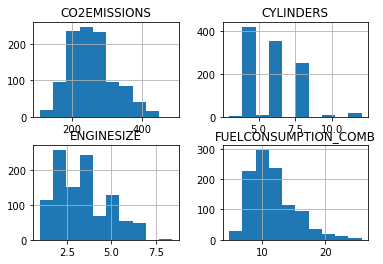

In [63]:
cdf.hist()
plt.show()

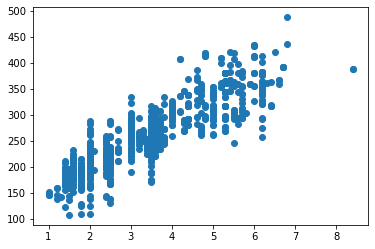

In [64]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS)

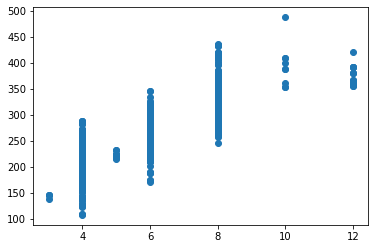

In [65]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS)

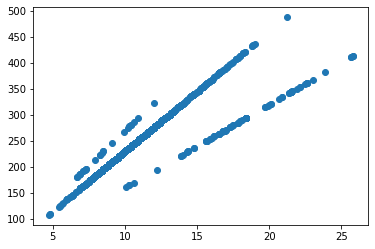

In [66]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS)

In [67]:
##creating taining and test set
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

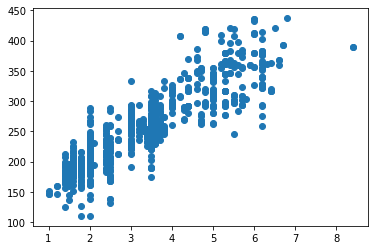

In [68]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS)

In [69]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
x=np.asanyarray(train[['ENGINESIZE']])
y=np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(x,y)

LinearRegression()

In [70]:
print('coeff is',reg.coef_)
print('intercept is',reg.intercept_)

coeff is [[38.5775217]]
intercept is [127.245861]


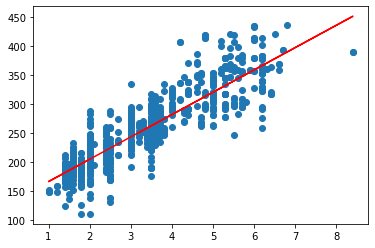

In [87]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS)
plt.plot(x,reg.coef_[0][0]*x+reg.intercept_[0],'-r')

In [100]:
test_x=test[['ENGINESIZE']]
test_y=test[['CO2EMISSIONS']]
predicted_value=reg.predict(test_x)
predicted_value

array([[219.83191308],
       [262.26718695],
       [269.98269129],
       [354.85323903],
       [308.56021299],
       [204.4009044 ],
       [242.9784261 ],
       [204.4009044 ],
       [242.9784261 ],
       [327.84897384],
       [327.84897384],
       [242.9784261 ],
       [281.5559478 ],
       [242.9784261 ],
       [204.4009044 ],
       [204.4009044 ],
       [204.4009044 ],
       [242.9784261 ],
       [242.9784261 ],
       [242.9784261 ],
       [242.9784261 ],
       [296.98695648],
       [242.9784261 ],
       [296.98695648],
       [296.98695648],
       [204.4009044 ],
       [242.9784261 ],
       [266.12493912],
       [219.83191308],
       [204.4009044 ],
       [219.83191308],
       [266.12493912],
       [266.12493912],
       [266.12493912],
       [266.12493912],
       [366.42649554],
       [366.42649554],
       [196.68540006],
       [266.12493912],
       [266.12493912],
       [331.70672601],
       [331.70672601],
       [331.70672601],
       [331

In [112]:
MAE=np.mean(np.absolute(predicted_value - test_y))
MAE

CO2EMISSIONS    23.283503
dtype: float64

In [114]:
MSE=np.mean((predicted_value-test_y) ** 2)
MSE

CO2EMISSIONS    953.595362
dtype: float64

In [115]:
from sklearn.metrics import r2_score
RS=r2_score(test_y,predicted_value)
RS

0.7546185371469374